In [81]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data and clean

In [82]:
ny_crime = pd.read_csv("ny_crime.csv", skiprows=5, names=["city", "population", "violent_crime", "murder", "rape_1",
                                                         "rape_2", "robbery", "aggravated_assult", "property_crime",
                                                         "burglary", "larceny_theft", "motor_vehicle_theft", "arson3"])
ny_crime.head()

,city,population,violent_crime,murder,rape_1,rape_2,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [83]:
ny_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
city                   351 non-null object
population             348 non-null object
violent_crime          348 non-null object
murder                 348 non-null float64
rape_1                 0 non-null float64
rape_2                 348 non-null object
robbery                348 non-null object
aggravated_assult      348 non-null object
property_crime         348 non-null object
burglary               348 non-null object
larceny_theft          348 non-null object
motor_vehicle_theft    348 non-null object
arson3                 187 non-null float64
dtypes: float64(3), object(10)
memory usage: 35.7+ KB


In [84]:
# Create dataframe to hold variables of interest and some data cleaning
ny_crime2 = pd.DataFrame()
ny_crime2["city"] = ny_crime["city"]

# Remove commas and cast as float
ny_crime2["property_crime"] = ny_crime["property_crime"].apply(lambda x: str(x).replace(",", "")).apply(lambda x: float(x))
ny_crime2["population"] = ny_crime["population"].apply(lambda x: str(x).replace(",", "")).apply(lambda x: float(x))

# Create population^2 variable
ny_crime2["population_sq"] = ny_crime2["population"] ** 2

# Convert murder and robbery into categorical variables
ny_crime2["murder"] = ny_crime["murder"].apply(lambda x: 1 if x > 0 else 0)
ny_crime2["robbery"] = ny_crime["robbery"].apply(lambda x: str(x).replace(",", "")).apply(lambda x: float(x)).apply(lambda x: 1 if x > 0 else 0)

ny_crime2.head()

,city,property_crime,population,population_sq,murder,robbery
0,Adams Village,12.0,1861.0,3.463321e+06,0,0
1,Addison Town and Village,24.0,2577.0,6.640929e+06,0,0
2,Akron Village,16.0,2846.0,8.099716e+06,0,0
3,Albany,4090.0,97956.0,9.595378e+09,1,1
4,Albion Village,223.0,6388.0,4.080654e+07,0,1


In [85]:
# Drop NA's
ny_crime2.dropna(inplace=True)
ny_crime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 6 columns):
city              348 non-null object
property_crime    348 non-null float64
population        348 non-null float64
population_sq     348 non-null float64
murder            348 non-null int64
robbery           348 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 19.0+ KB


## EDA

In [86]:
ny_crime2["property_crime"].describe().apply(lambda x: format(x, ".2f"))

count       348.00
mean        792.61
std        7659.72
min           0.00
25%          40.50
50%         112.50
75%         341.00
max      141971.00
Name: property_crime, dtype: object

In [87]:
ny_crime2[ny_crime2["property_crime"] > 141970]

,city,property_crime,population,population_sq,murder,robbery
216,New York,141971.0,8396126.0,7.049493e+13,1,1


In [88]:
# Drop New York City ???
#ny_crime2.drop(216, inplace=True)
#ny_crime2["property_crime"].describe().apply(lambda x: format(x, ".2f"))

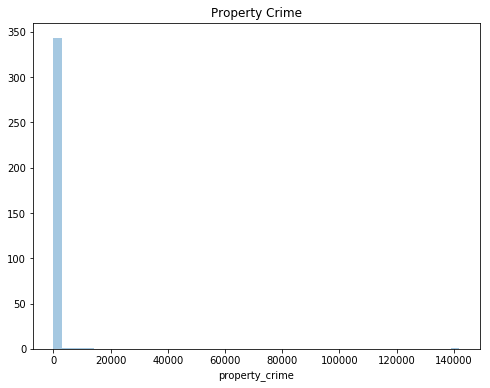

In [89]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(ny_crime2["property_crime"], kde=False)
plt.title("Property Crime")
plt.show()

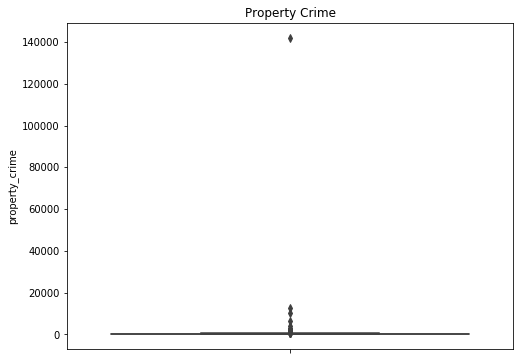

In [90]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(y="property_crime", data=ny_crime2)
plt.title("Property Crime")
plt.show()

In [91]:
ny_crime2["population"].describe().apply(lambda x: format(x, ".2f"))

count        348.00
mean       40037.63
std       450037.37
min          526.00
25%         3003.00
50%         7233.50
75%        18427.50
max      8396126.00
Name: population, dtype: object

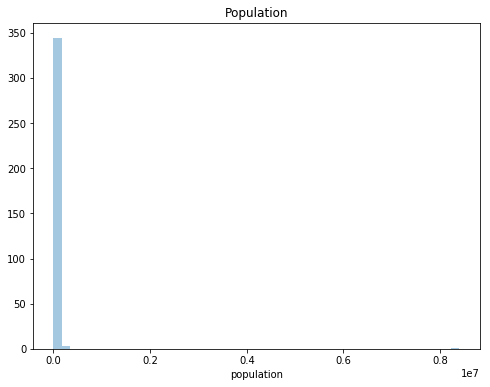

In [92]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(ny_crime2["population"], kde=False)
plt.title("Population")
plt.show()

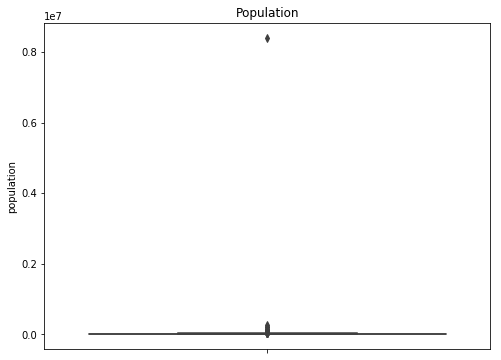

In [93]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(y="population", data=ny_crime2)
plt.title("Population")
plt.show()

In [94]:
ny_crime2["population_sq"].describe().apply(lambda x: format(x, ".2f"))

count               348.00
mean       203554650960.24
std       3778875542708.13
min              276676.00
25%             9018117.00
50%            52325684.50
75%           339753567.00
max      70494931807876.00
Name: population_sq, dtype: object

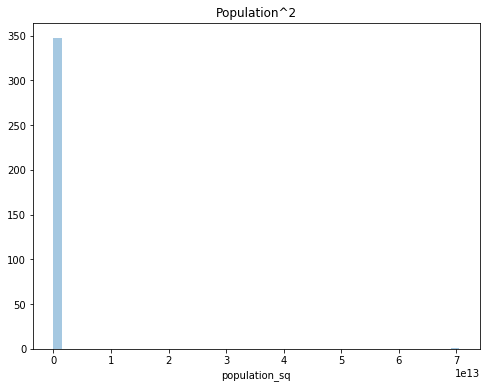

In [95]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(ny_crime2["population_sq"], kde=False)
plt.title("Population^2")
plt.show()

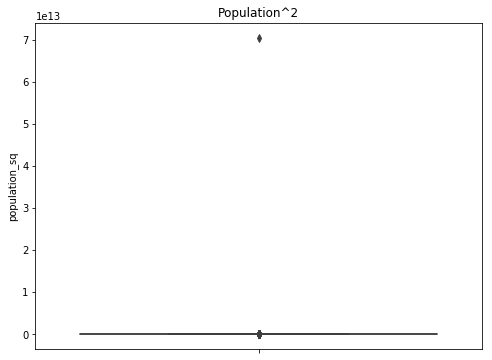

In [96]:
fig = plt.figure(figsize=(8, 6))
sns.boxplot(y="population_sq", data=ny_crime2)
plt.title("Population^2")
plt.show()

In [97]:
ny_crime2["murder"].describe().apply(lambda x: format(x, ".2f"))

count    348.00
mean       0.14
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: murder, dtype: object

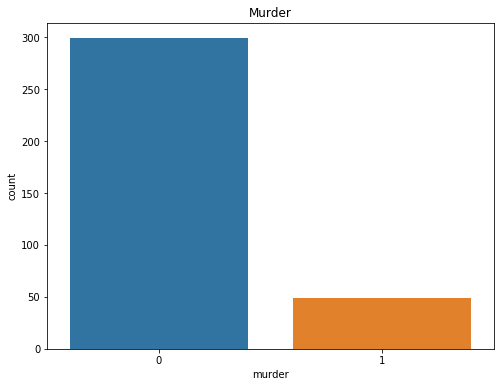

In [98]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(x="murder", data=ny_crime2)
plt.title("Murder")
plt.show()

In [99]:
ny_crime2["robbery"].describe().apply(lambda x: format(x, ".2f"))

count    348.00
mean       0.60
std        0.49
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        1.00
Name: robbery, dtype: object

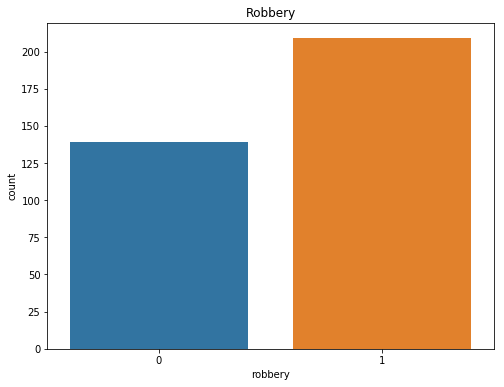

In [100]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(x="robbery", data=ny_crime2)
plt.title("Robbery")
plt.show()

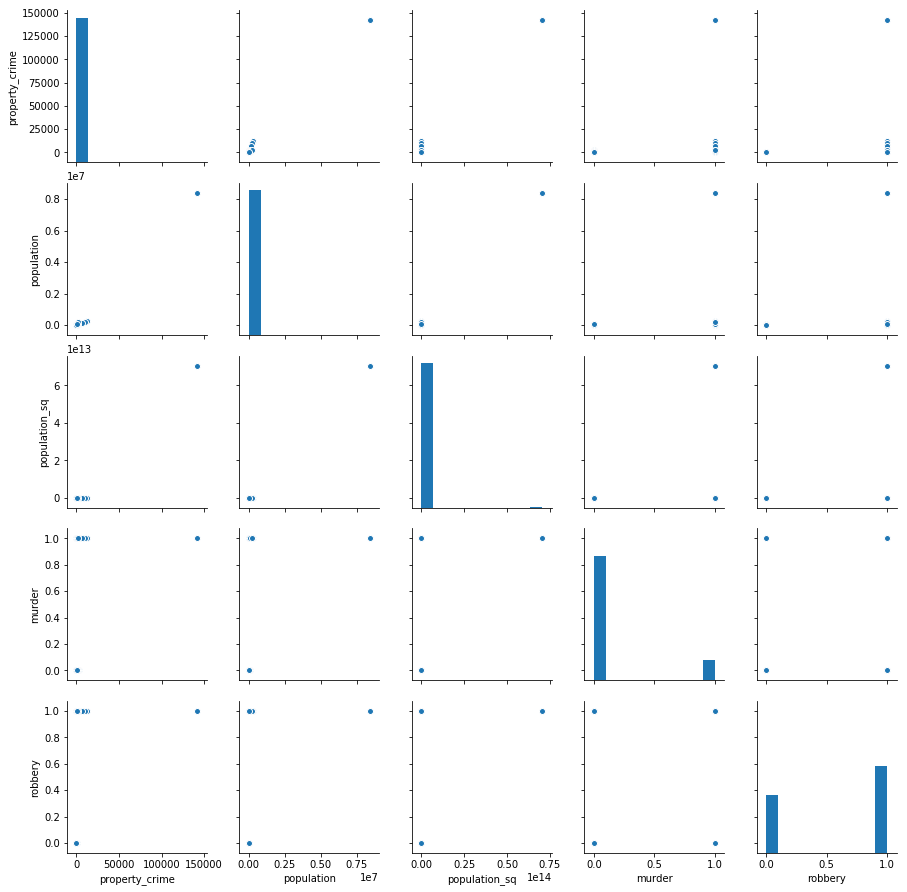

In [101]:
sns.pairplot(ny_crime2)
plt.show()

In [102]:
X = ny_crime2[["population", "population_sq", "murder", "robbery"]]
y = ny_crime2["property_crime"]

# Instantiate the model
regr = LinearRegression()
regr.fit(X=X.dropna(), y=y.dropna())


print("Coefficients:\n", regr.coef_)
print("Intercept:\n", regr.intercept_)

Coefficients:
 [ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]
Intercept:
 -109.57533562257493
